# ReSkill+ - Modelos de Inteligência Artificial

Este notebook desenvolve os modelos preditivos para o projeto ReSkill+:
- **Classificação**: Predição do perfil do trabalhador
- **Regressão**: Predição do risco de automação
- **Agrupamento**: Segmentação de trabalhadores para recomendações personalizadas

## 1. Importação de Bibliotecas

In [2]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    mean_absolute_error, mean_squared_error, r2_score,
    silhouette_score
)

# Salvamento de modelos
import pickle
import warnings
warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 2. Carregamento e Análise Exploratória dos Dados

In [3]:
# Carregar datasets
df_perfil = pd.read_csv('../data/perfil_trabalhador.csv')
df_risco = pd.read_csv('../data/risco_automacao.csv')
df_cursos = pd.read_csv('../data/cursos_recomendacao.csv')

print("Dataset de Perfil do Trabalhador:")
print(df_perfil.head())
print(f"\nShape: {df_perfil.shape}")
print(f"\nInfo:")
print(df_perfil.info())

Dataset de Perfil do Trabalhador:
   id  idade escolaridade  anos_experiencia   area_atuacao  \
0   1     28     superior                 5             TI   
1   2     45        medio                20  administracao   
2   3     35     superior                10      marketing   
3   4     52  fundamental                25       producao   
4   5     29     superior                 4         design   

   habilidades_digitais  renda_mensal setor_industria                 perfil  
0                     8          4500      tecnologia          tech_avancado  
1                     4          3200        servicos            tradicional  
2                     7          5800        comercio  digital_intermediario  
3                     2          2800       industria            tradicional  
4                     9          4200      tecnologia          tech_avancado  

Shape: (100, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 co

In [4]:
print("\nDataset de Risco de Automação:")
print(df_risco.head())
print(f"\nShape: {df_risco.shape}")


Dataset de Risco de Automação:
   id                ocupacao  repetitividade  criatividade_requerida  \
0   1  desenvolvedor_software               3                       9   
1   2  gerente_administrativo               5                       4   
2   3      analista_marketing               4                       7   
3   4        operador_maquina               9                       2   
4   5             designer_ux               2                      10   

   interacao_humana  complexidade_tecnica  nivel_educacao  risco_automacao  
0                 6                     9               5             15.5  
1                 8                     5               4             45.2  
2                 7                     6               5             28.3  
3                 3                     3               2             85.7  
4                 7                     8               5             12.4  

Shape: (100, 8)


In [5]:
print("\nDataset de Cursos e Recomendações:")
print(df_cursos.head())
print(f"\nShape: {df_cursos.shape}")


Dataset de Cursos e Recomendações:
   id                 perfil        area_interesse    nivel_atual  \
0   1          tech_avancado                 ia_ml       avancado   
1   2            tradicional     tecnologia_basica      iniciante   
2   3  digital_intermediario     marketing_digital  intermediario   
3   4            tradicional  qualificacao_tecnica      iniciante   
4   5          tech_avancado       desenvolvimento       avancado   

             curso_recomendado  duracao_horas  custo  modalidade  \
0  Deep Learning Especializado            120   2500      online   
1     Introducao a Informatica             40    300  presencial   
2    Growth Marketing Avancado             80   1200     hibrido   
3  Automacao Industrial Basica             60    500  presencial   
4      Arquitetura de Software            100   2200      online   

   score_relevancia  
0              95.5  
1              88.2  
2              91.7  
3              85.3  
4              94.8  

Shape: 

In [6]:
# Estatísticas descritivas
print("\nEstatísticas do Perfil:")
print(df_perfil.describe())


Estatísticas do Perfil:
               id       idade  anos_experiencia  habilidades_digitais  \
count  100.000000  100.000000        100.000000             100.00000   
mean    50.500000   39.390000         13.840000               6.28000   
std     29.011492    8.593978          8.011003               2.71576   
min      1.000000   25.000000          1.000000               2.00000   
25%     25.750000   31.750000          7.000000               3.00000   
50%     50.500000   39.500000         13.000000               7.00000   
75%     75.250000   47.000000         21.000000               9.00000   
max    100.000000   55.000000         30.000000              10.00000   

       renda_mensal  
count    100.000000  
mean    5536.000000  
std     2019.976998  
min     2400.000000  
25%     3375.000000  
50%     5750.000000  
75%     6800.000000  
max    10500.000000  


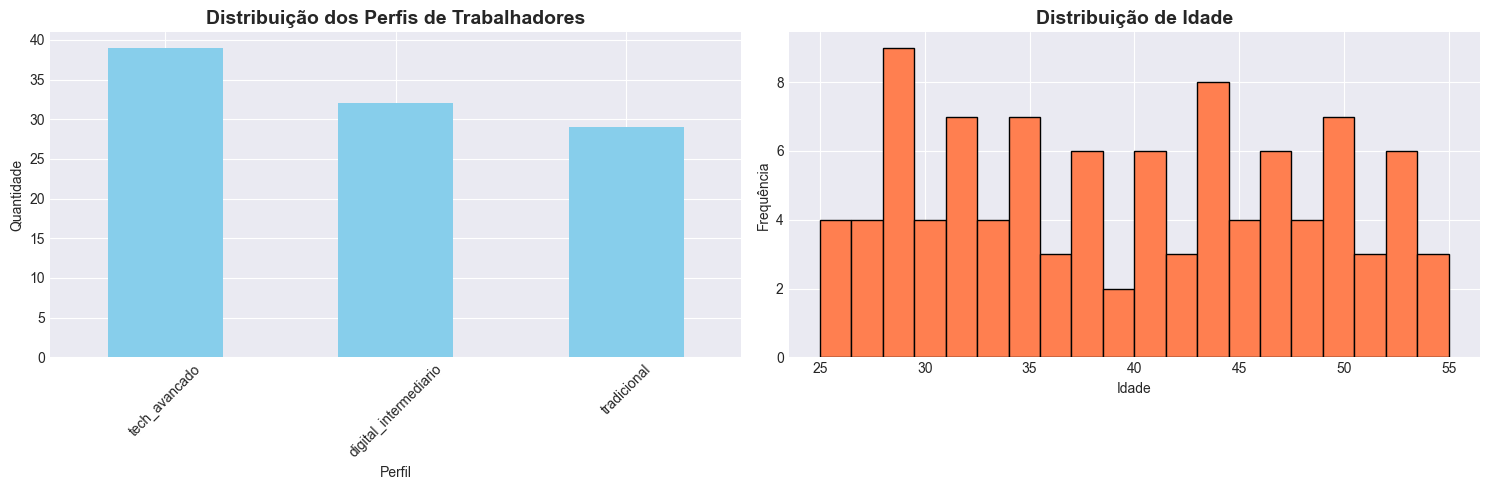

In [7]:
# Distribuição dos perfis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Contagem de perfis
df_perfil['perfil'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição dos Perfis de Trabalhadores', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Perfil')
axes[0].set_ylabel('Quantidade')
axes[0].tick_params(axis='x', rotation=45)

# Distribuição de idade
df_perfil['idade'].hist(bins=20, ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Distribuição de Idade', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

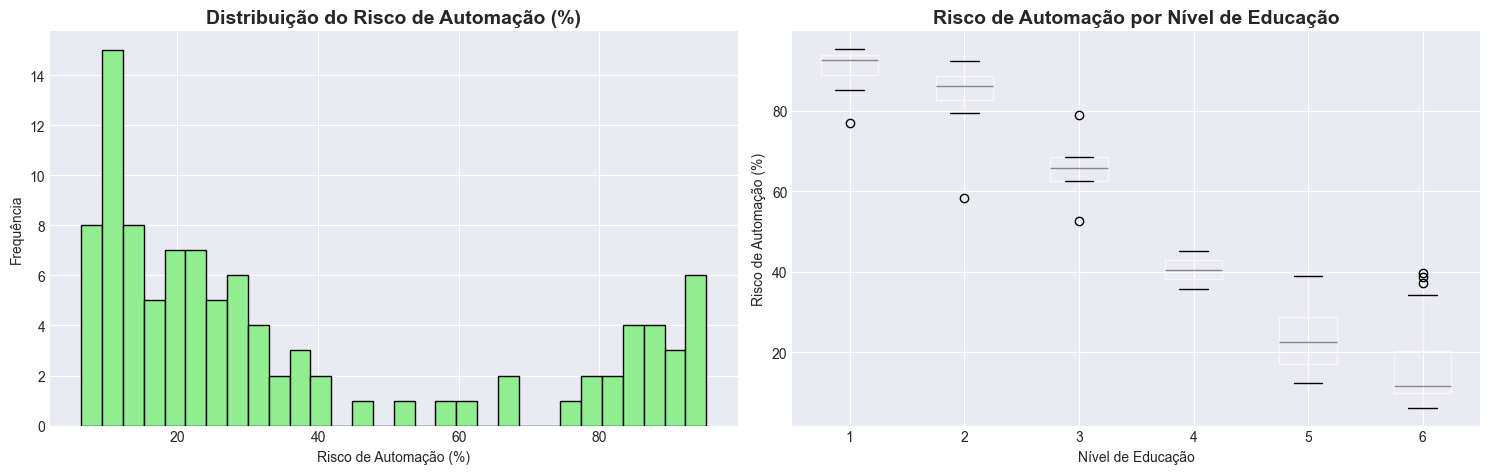

In [8]:
# Análise de risco de automação
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribuição do risco
df_risco['risco_automacao'].hist(bins=30, ax=axes[0], color='lightgreen', edgecolor='black')
axes[0].set_title('Distribuição do Risco de Automação (%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Risco de Automação (%)')
axes[0].set_ylabel('Frequência')

# Boxplot por nível de educação
df_risco.boxplot(column='risco_automacao', by='nivel_educacao', ax=axes[1])
axes[1].set_title('Risco de Automação por Nível de Educação', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Nível de Educação')
axes[1].set_ylabel('Risco de Automação (%)')
plt.suptitle('')

plt.tight_layout()
plt.show()

## 3. Pré-processamento de Dados

In [9]:
# Preparação para Classificação (Perfil do Trabalhador)
df_class = df_perfil.copy()

# Codificar variáveis categóricas
le_escolaridade = LabelEncoder()
le_area = LabelEncoder()
le_setor = LabelEncoder()
le_perfil = LabelEncoder()

df_class['escolaridade_enc'] = le_escolaridade.fit_transform(df_class['escolaridade'])
df_class['area_atuacao_enc'] = le_area.fit_transform(df_class['area_atuacao'])
df_class['setor_industria_enc'] = le_setor.fit_transform(df_class['setor_industria'])
df_class['perfil_enc'] = le_perfil.fit_transform(df_class['perfil'])

# Features e target para classificação
X_class = df_class[['idade', 'escolaridade_enc', 'anos_experiencia', 'area_atuacao_enc', 
                     'habilidades_digitais', 'renda_mensal', 'setor_industria_enc']]
y_class = df_class['perfil_enc']

print("Features para Classificação:")
print(X_class.head())
print(f"\nTarget (Perfil): {le_perfil.classes_}")

Features para Classificação:
   idade  escolaridade_enc  anos_experiencia  area_atuacao_enc  \
0     28                 3                 5                 0   
1     45                 1                20                 1   
2     35                 3                10                57   
3     52                 0                25                78   
4     29                 3                 4                29   

   habilidades_digitais  renda_mensal  setor_industria_enc  
0                     8          4500                    7  
1                     4          3200                    6  
2                     7          5800                    0  
3                     2          2800                    3  
4                     9          4200                    7  

Target (Perfil): ['digital_intermediario' 'tech_avancado' 'tradicional']


In [10]:
# Preparação para Regressão (Risco de Automação)
df_reg = df_risco.copy()

# Features e target para regressão
X_reg = df_reg[['repetitividade', 'criatividade_requerida', 'interacao_humana', 
                'complexidade_tecnica', 'nivel_educacao']]
y_reg = df_reg['risco_automacao']

print("\nFeatures para Regressão:")
print(X_reg.head())
print(f"\nTarget (Risco): min={y_reg.min():.2f}%, max={y_reg.max():.2f}%")


Features para Regressão:
   repetitividade  criatividade_requerida  interacao_humana  \
0               3                       9                 6   
1               5                       4                 8   
2               4                       7                 7   
3               9                       2                 3   
4               2                      10                 7   

   complexidade_tecnica  nivel_educacao  
0                     9               5  
1                     5               4  
2                     6               5  
3                     3               2  
4                     8               5  

Target (Risco): min=6.30%, max=95.20%


In [11]:
# Preparação para Clustering
# Combinar informações relevantes para segmentação
df_cluster = df_perfil.merge(df_risco[['id', 'risco_automacao']], on='id', how='left')

# Features para clustering
X_cluster = df_cluster[['idade', 'anos_experiencia', 'habilidades_digitais', 
                        'renda_mensal', 'risco_automacao']].fillna(df_cluster['risco_automacao'].mean())

# Normalização para clustering
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print("\nFeatures para Clustering (normalizado):")
print(pd.DataFrame(X_cluster_scaled, columns=X_cluster.columns).head())


Features para Clustering (normalizado):
      idade  anos_experiencia  habilidades_digitais  renda_mensal  \
0 -1.332023         -1.109042              0.636531     -0.515461   
1  0.656071          0.772816             -0.843773     -1.162275   
2 -0.513396         -0.481756              0.266455      0.131353   
3  1.474698          1.400102             -1.583925     -1.361294   
4 -1.215077         -1.234499              1.006607     -0.664726   

   risco_automacao  
0        -0.711457  
1         0.285630  
2        -0.281736  
3         1.645295  
4        -0.815530  


## 4. Modelo de Classificação - Random Forest

In [12]:
# Split dos dados
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

print(f"Tamanho do conjunto de treino: {X_train_class.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test_class.shape[0]}")

Tamanho do conjunto de treino: 80
Tamanho do conjunto de teste: 20


In [13]:
# Treinar Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train_class, y_train_class)
print("Modelo Random Forest treinado com sucesso!")

Modelo Random Forest treinado com sucesso!


In [14]:
# Predições
y_pred_class = rf_classifier.predict(X_test_class)

# Avaliação
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"\nAcurácia do Modelo: {accuracy:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test_class, y_pred_class, target_names=le_perfil.classes_))


Acurácia do Modelo: 1.0000

Relatório de Classificação:
                       precision    recall  f1-score   support

digital_intermediario       1.00      1.00      1.00         6
        tech_avancado       1.00      1.00      1.00         8
          tradicional       1.00      1.00      1.00         6

             accuracy                           1.00        20
            macro avg       1.00      1.00      1.00        20
         weighted avg       1.00      1.00      1.00        20



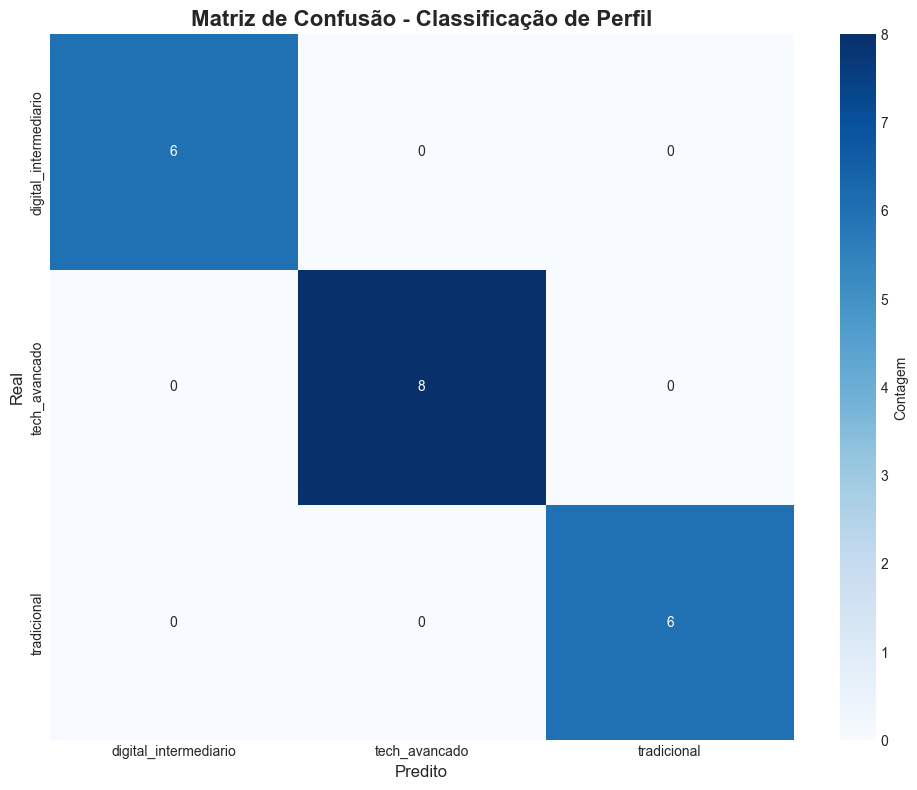

In [15]:
# Matriz de Confusão
cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_perfil.classes_, 
            yticklabels=le_perfil.classes_,
            cbar_kws={'label': 'Contagem'})
plt.title('Matriz de Confusão - Classificação de Perfil', fontsize=16, fontweight='bold')
plt.xlabel('Predito', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.tight_layout()
plt.show()

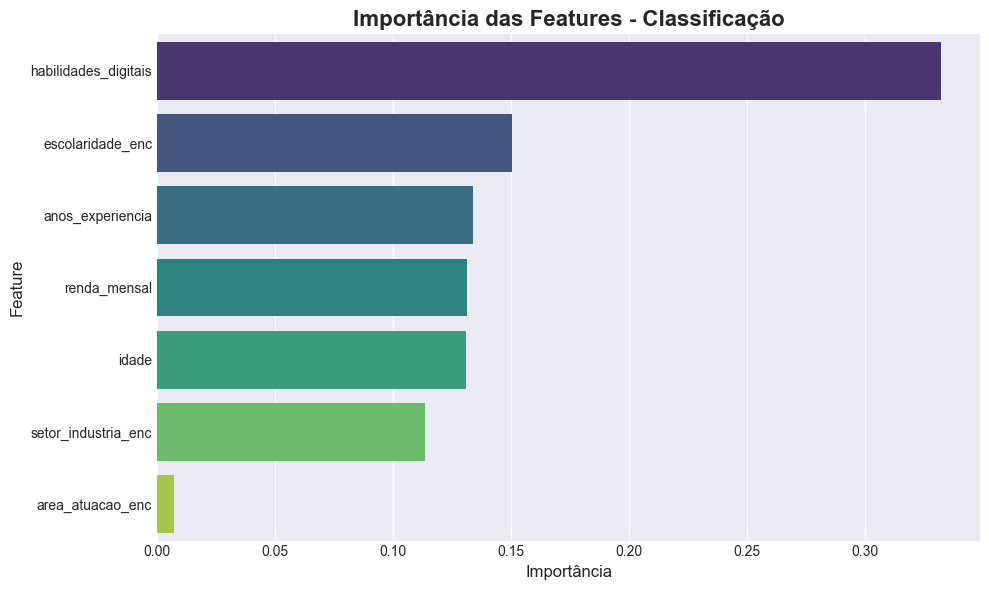


Importância das Features:
                feature  importance
4  habilidades_digitais    0.332271
1      escolaridade_enc    0.150569
2      anos_experiencia    0.134115
5          renda_mensal    0.131250
0                 idade    0.130997
6   setor_industria_enc    0.113717
3      area_atuacao_enc    0.007082


In [16]:
# Importância das Features
feature_importance = pd.DataFrame({
    'feature': X_class.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Importância das Features - Classificação', fontsize=16, fontweight='bold')
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\nImportância das Features:")
print(feature_importance)

## 5. Modelo de Regressão - Gradient Boosting

In [17]:
# Split dos dados
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Tamanho do conjunto de treino: {X_train_reg.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test_reg.shape[0]}")

Tamanho do conjunto de treino: 80
Tamanho do conjunto de teste: 20


In [18]:
# Treinar Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

gb_regressor.fit(X_train_reg, y_train_reg)
print("Modelo Gradient Boosting treinado com sucesso!")

Modelo Gradient Boosting treinado com sucesso!


In [19]:
# Predições
y_pred_reg = gb_regressor.predict(X_test_reg)

# Avaliação
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nMétricas de Avaliação:")
print(f"MAE (Mean Absolute Error): {mae:.4f}%")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}%")
print(f"R² Score: {r2:.4f}")


Métricas de Avaliação:
MAE (Mean Absolute Error): 1.6251%
MSE (Mean Squared Error): 5.7766
RMSE (Root Mean Squared Error): 2.4035%
R² Score: 0.9929


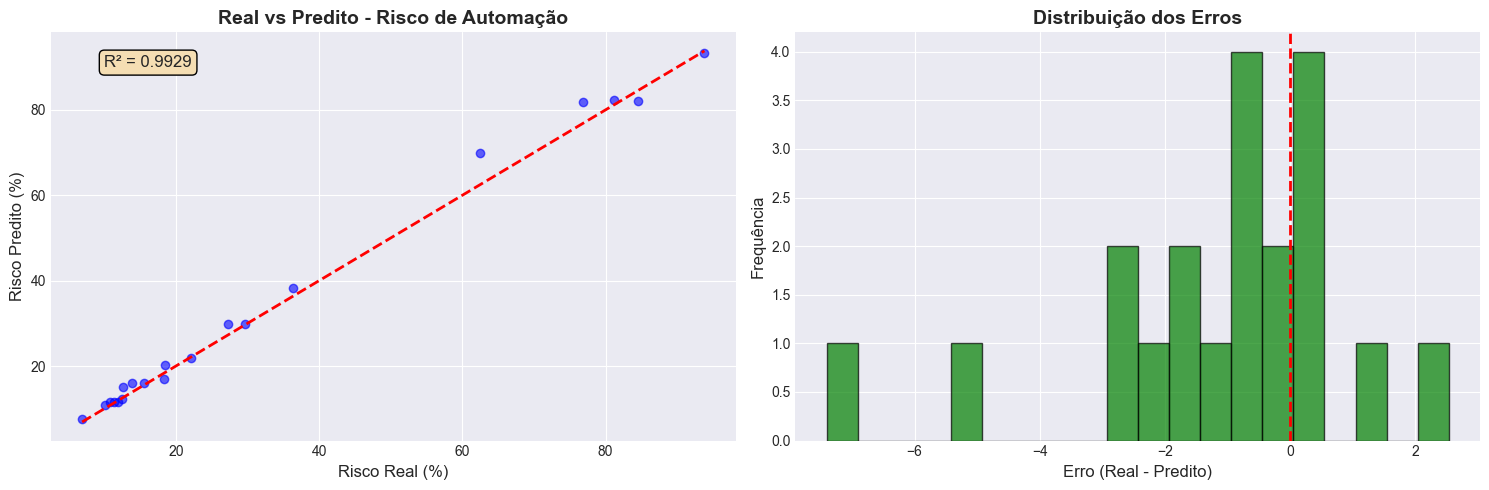

In [20]:
# Visualização das predições
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot: Real vs Predito
axes[0].scatter(y_test_reg, y_pred_reg, alpha=0.6, color='blue')
axes[0].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 
             'r--', lw=2)
axes[0].set_xlabel('Risco Real (%)', fontsize=12)
axes[0].set_ylabel('Risco Predito (%)', fontsize=12)
axes[0].set_title('Real vs Predito - Risco de Automação', fontsize=14, fontweight='bold')
axes[0].text(10, 90, f'R² = {r2:.4f}', fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat'))

# Distribuição dos erros
residuals = y_test_reg - y_pred_reg
axes[1].hist(residuals, bins=20, color='green', edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Erro (Real - Predito)', fontsize=12)
axes[1].set_ylabel('Frequência', fontsize=12)
axes[1].set_title('Distribuição dos Erros', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

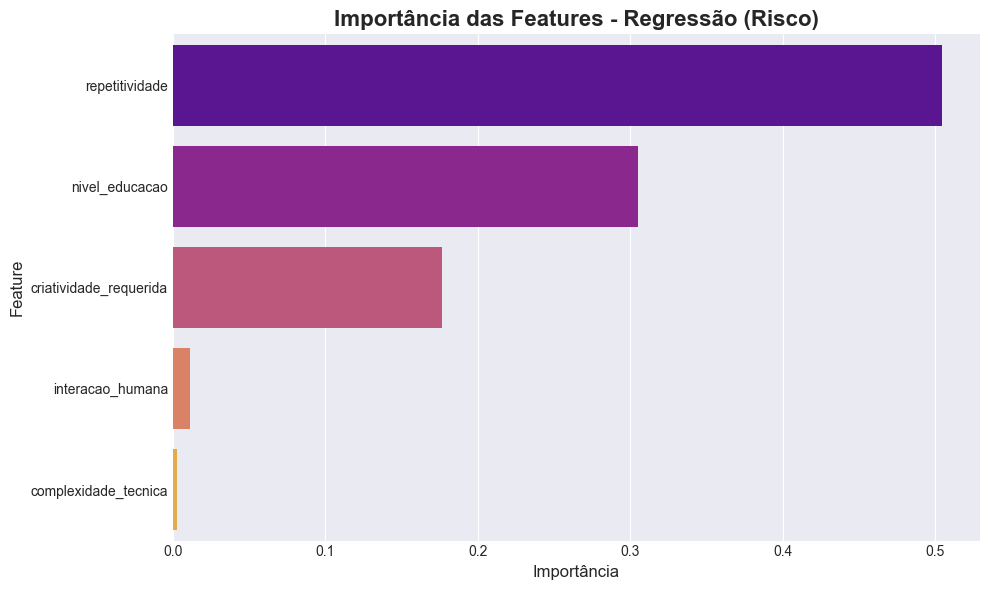


Importância das Features:
                  feature  importance
0          repetitividade    0.504061
4          nivel_educacao    0.305235
1  criatividade_requerida    0.176678
2        interacao_humana    0.011306
3    complexidade_tecnica    0.002720


In [21]:
# Importância das Features - Regressão
feature_importance_reg = pd.DataFrame({
    'feature': X_reg.columns,
    'importance': gb_regressor.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_reg, x='importance', y='feature', palette='plasma')
plt.title('Importância das Features - Regressão (Risco)', fontsize=16, fontweight='bold')
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\nImportância das Features:")
print(feature_importance_reg)

## 6. Modelo de Agrupamento - KMeans

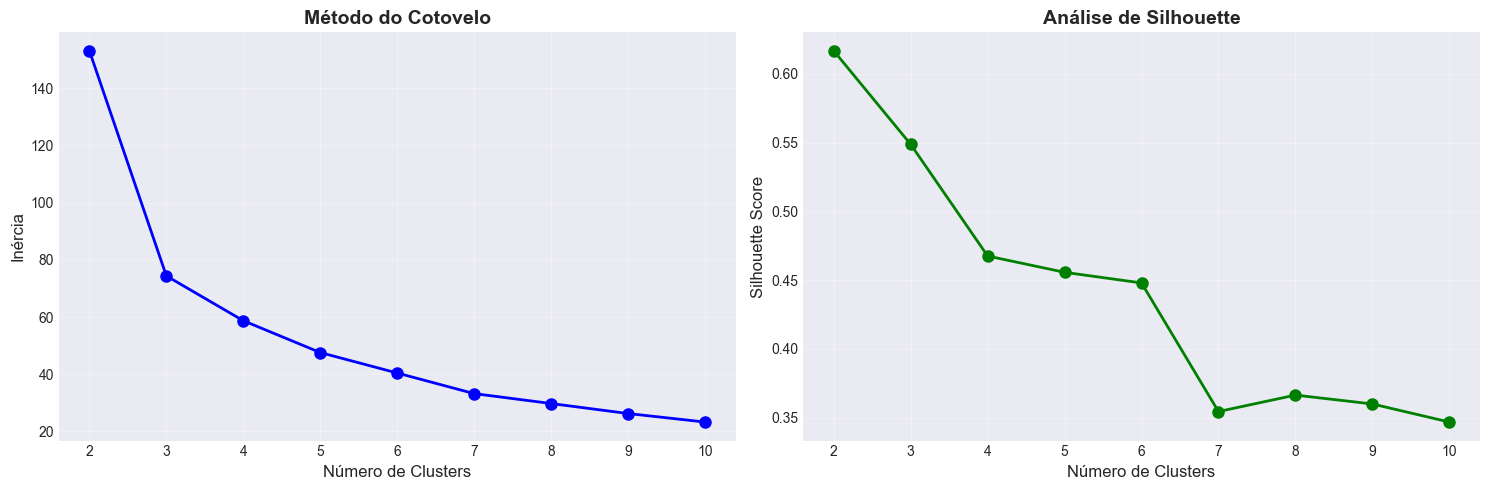

In [22]:
# Método do cotovelo para determinar número ideal de clusters
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_cluster_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans_temp.labels_))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Número de Clusters', fontsize=12)
axes[0].set_ylabel('Inércia', fontsize=12)
axes[0].set_title('Método do Cotovelo', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Número de Clusters', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Análise de Silhouette', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
# Treinar KMeans com k=4 (baseado na análise)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

# Adicionar labels ao dataframe
df_cluster['cluster'] = cluster_labels

print(f"\nKMeans treinado com {n_clusters} clusters!")
print(f"Silhouette Score: {silhouette_score(X_cluster_scaled, cluster_labels):.4f}")
print(f"\nDistribuição dos Clusters:")
print(df_cluster['cluster'].value_counts().sort_index())


KMeans treinado com 4 clusters!
Silhouette Score: 0.4676

Distribuição dos Clusters:
cluster
0    17
1    28
2    18
3    37
Name: count, dtype: int64


In [24]:
# Análise dos clusters
cluster_summary = df_cluster.groupby('cluster').agg({
    'idade': 'mean',
    'anos_experiencia': 'mean',
    'habilidades_digitais': 'mean',
    'renda_mensal': 'mean',
    'risco_automacao': 'mean'
}).round(2)

print("\nCaracterísticas dos Clusters:")
print(cluster_summary)


Características dos Clusters:
         idade  anos_experiencia  habilidades_digitais  renda_mensal  \
cluster                                                                
0        37.76             11.24                  6.71       5735.29   
1        49.25             24.50                  2.61       2917.86   
2        44.50             16.22                  5.83       7994.44   
3        30.19              5.81                  9.08       6229.73   

         risco_automacao  
cluster                   
0                  25.68  
1                  81.39  
2                  27.48  
3                  12.41  


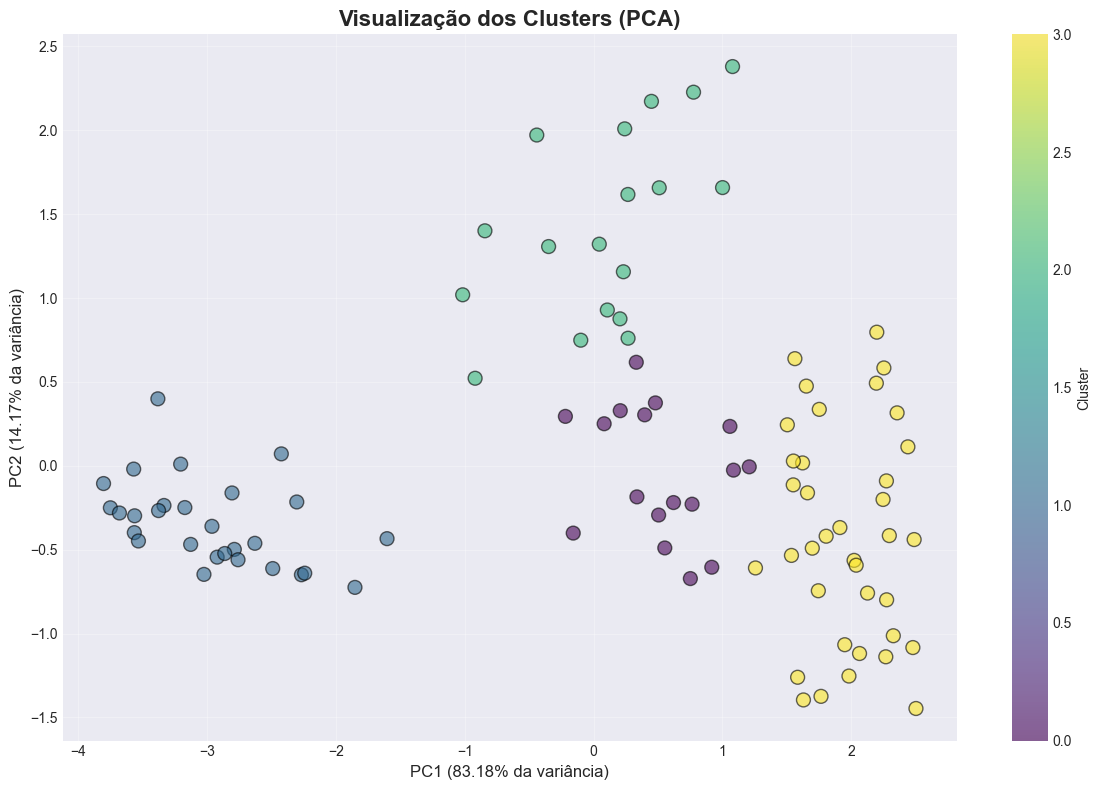

In [25]:
# Visualização dos clusters
from sklearn.decomposition import PCA

# Reduzir para 2 dimensões para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                     cmap='viridis', s=100, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} da variância)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} da variância)', fontsize=12)
plt.title('Visualização dos Clusters (PCA)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

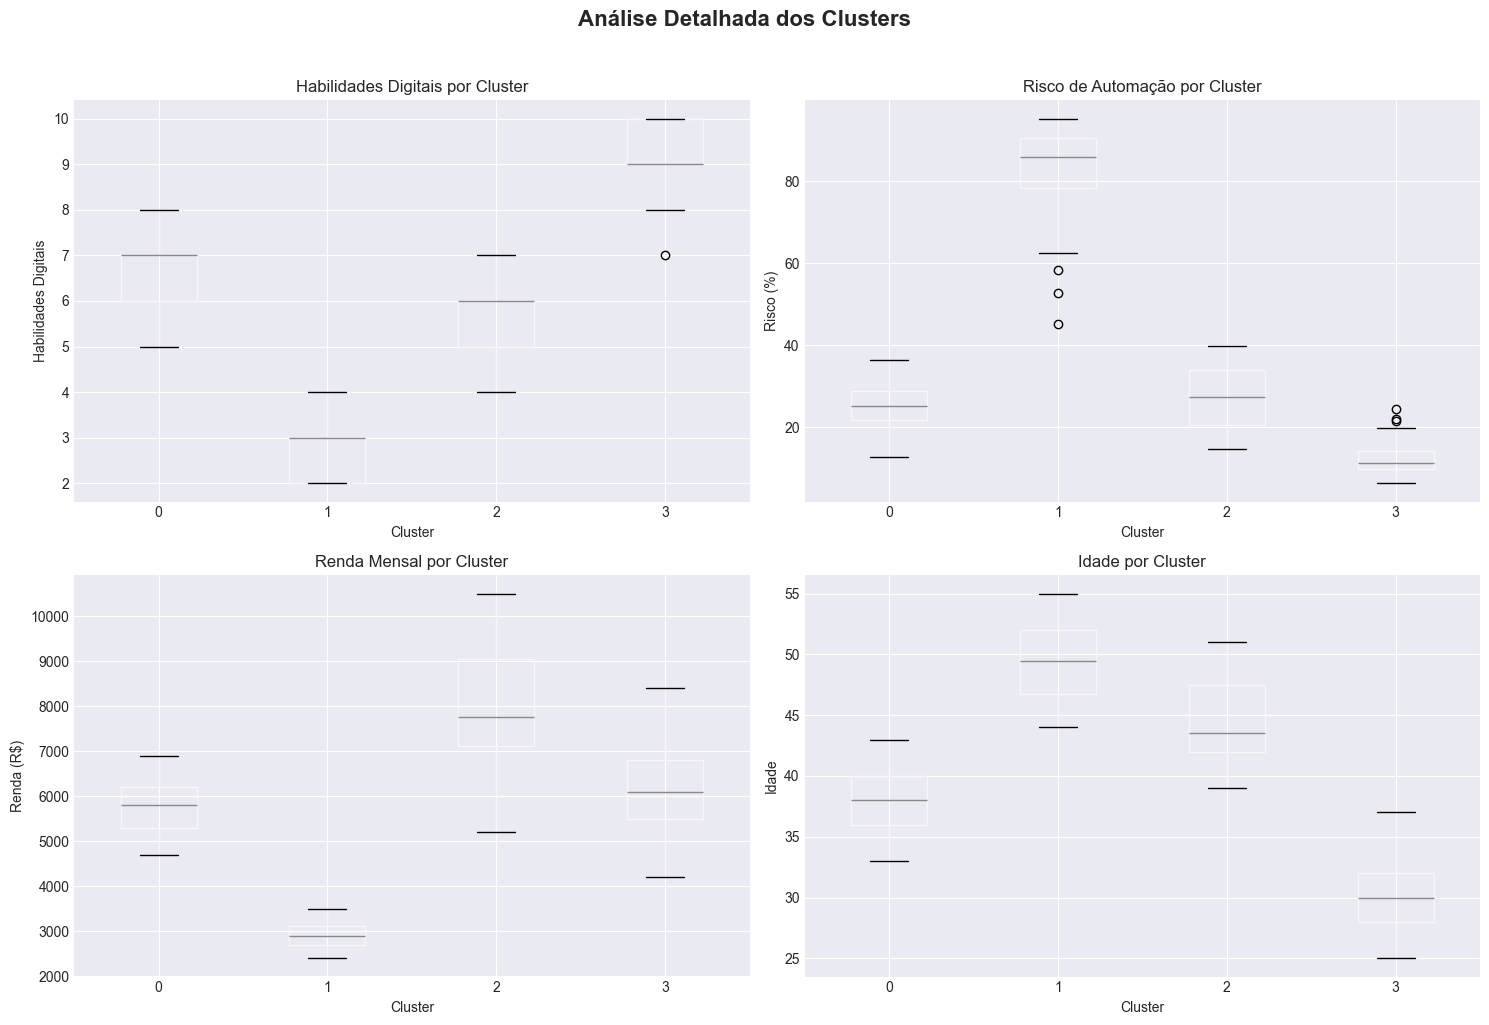

In [26]:
# Interpretação dos clusters
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Habilidades digitais por cluster
df_cluster.boxplot(column='habilidades_digitais', by='cluster', ax=axes[0, 0])
axes[0, 0].set_title('Habilidades Digitais por Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Habilidades Digitais')

# Risco de automação por cluster
df_cluster.boxplot(column='risco_automacao', by='cluster', ax=axes[0, 1])
axes[0, 1].set_title('Risco de Automação por Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Risco (%)')

# Renda por cluster
df_cluster.boxplot(column='renda_mensal', by='cluster', ax=axes[1, 0])
axes[1, 0].set_title('Renda Mensal por Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Renda (R$)')

# Idade por cluster
df_cluster.boxplot(column='idade', by='cluster', ax=axes[1, 1])
axes[1, 1].set_title('Idade por Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Idade')

plt.suptitle('Análise Detalhada dos Clusters', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 7. Salvamento dos Modelos e Encoders

In [27]:
import os

# Criar diretório de modelos se não existir
models_dir = '../models'
os.makedirs(models_dir, exist_ok=True)

# Salvar modelo de classificação
with open(f'{models_dir}/classificador_perfil.pickle', 'wb') as f:
    pickle.dump(rf_classifier, f)
print("Modelo de Classificação salvo: classificador_perfil.pickle")

# Salvar modelo de regressão
with open(f'{models_dir}/regressor_risco.pickle', 'wb') as f:
    pickle.dump(gb_regressor, f)
print("Modelo de Regressão salvo: regressor_risco.pickle")

# Salvar modelo de clustering
with open(f'{models_dir}/clustering_kmeans.pickle', 'wb') as f:
    pickle.dump(kmeans, f)
print("Modelo de Clustering salvo: clustering_kmeans.pickle")

# Salvar encoders
encoders = {
    'le_escolaridade': le_escolaridade,
    'le_area': le_area,
    'le_setor': le_setor,
    'le_perfil': le_perfil
}

with open(f'{models_dir}/encoders.pickle', 'wb') as f:
    pickle.dump(encoders, f)
print("Encoders salvos: encoders.pickle")

# Salvar scaler do clustering
with open(f'{models_dir}/scaler_cluster.pickle', 'wb') as f:
    pickle.dump(scaler_cluster, f)
print("Scaler salvo: scaler_cluster.pickle")

print("\n✅ Todos os modelos foram salvos com sucesso!")

Modelo de Classificação salvo: classificador_perfil.pickle
Modelo de Regressão salvo: regressor_risco.pickle
Modelo de Clustering salvo: clustering_kmeans.pickle
Encoders salvos: encoders.pickle
Scaler salvo: scaler_cluster.pickle

✅ Todos os modelos foram salvos com sucesso!


## 8. Teste de Carregamento e Predição

In [28]:
# Carregar modelos para teste
with open(f'{models_dir}/classificador_perfil.pickle', 'rb') as f:
    modelo_class_teste = pickle.load(f)

with open(f'{models_dir}/regressor_risco.pickle', 'rb') as f:
    modelo_reg_teste = pickle.load(f)

with open(f'{models_dir}/encoders.pickle', 'rb') as f:
    encoders_teste = pickle.load(f)

print("✅ Modelos carregados com sucesso!")

# Exemplo de predição
exemplo_trabalhador = X_class.iloc[0:1]
print("\nExemplo de Trabalhador:")
print(exemplo_trabalhador)

# Predição do perfil
perfil_pred = modelo_class_teste.predict(exemplo_trabalhador)
perfil_nome = encoders_teste['le_perfil'].inverse_transform(perfil_pred)
print(f"\nPerfil Predito: {perfil_nome[0]}")

# Exemplo de predição de risco
exemplo_risco = X_reg.iloc[0:1]
print("\nExemplo para Risco de Automação:")
print(exemplo_risco)

risco_pred = modelo_reg_teste.predict(exemplo_risco)
print(f"\nRisco de Automação Predito: {risco_pred[0]:.2f}%")

✅ Modelos carregados com sucesso!

Exemplo de Trabalhador:
   idade  escolaridade_enc  anos_experiencia  area_atuacao_enc  \
0     28                 3                 5                 0   

   habilidades_digitais  renda_mensal  setor_industria_enc  
0                     8          4500                    7  

Perfil Predito: tech_avancado

Exemplo para Risco de Automação:
   repetitividade  criatividade_requerida  interacao_humana  \
0               3                       9                 6   

   complexidade_tecnica  nivel_educacao  
0                     9               5  

Risco de Automação Predito: 16.05%


## 9. Resumo Final

In [29]:
print("="*80)
print("RESUMO DOS MODELOS DESENVOLVIDOS")
print("="*80)

print("\n1. MODELO DE CLASSIFICAÇÃO (Random Forest)")
print(f"   - Objetivo: Predizer perfil do trabalhador")
print(f"   - Classes: {', '.join(le_perfil.classes_)}")
print(f"   - Acurácia: {accuracy:.4f}")
print(f"   - Arquivo: classificador_perfil.pickle")

print("\n2. MODELO DE REGRESSÃO (Gradient Boosting)")
print(f"   - Objetivo: Predizer risco de automação (%)")
print(f"   - MAE: {mae:.4f}%")
print(f"   - R² Score: {r2:.4f}")
print(f"   - Arquivo: regressor_risco.pickle")

print("\n3. MODELO DE AGRUPAMENTO (KMeans)")
print(f"   - Objetivo: Segmentar trabalhadores")
print(f"   - Número de clusters: {n_clusters}")
print(f"   - Silhouette Score: {silhouette_score(X_cluster_scaled, cluster_labels):.4f}")
print(f"   - Arquivo: clustering_kmeans.pickle")

print("\n4. ARQUIVOS AUXILIARES")
print(f"   - encoders.pickle: Label encoders para variáveis categóricas")
print(f"   - scaler_cluster.pickle: Normalizador para clustering")

print("\n" + "="*80)
print("✅ Pipeline de Machine Learning concluído com sucesso!")
print("="*80)

RESUMO DOS MODELOS DESENVOLVIDOS

1. MODELO DE CLASSIFICAÇÃO (Random Forest)
   - Objetivo: Predizer perfil do trabalhador
   - Classes: digital_intermediario, tech_avancado, tradicional
   - Acurácia: 1.0000
   - Arquivo: classificador_perfil.pickle

2. MODELO DE REGRESSÃO (Gradient Boosting)
   - Objetivo: Predizer risco de automação (%)
   - MAE: 1.6251%
   - R² Score: 0.9929
   - Arquivo: regressor_risco.pickle

3. MODELO DE AGRUPAMENTO (KMeans)
   - Objetivo: Segmentar trabalhadores
   - Número de clusters: 4
   - Silhouette Score: 0.4676
   - Arquivo: clustering_kmeans.pickle

4. ARQUIVOS AUXILIARES
   - encoders.pickle: Label encoders para variáveis categóricas
   - scaler_cluster.pickle: Normalizador para clustering

✅ Pipeline de Machine Learning concluído com sucesso!
